## importing necessary libraries

In [1]:
import numpy as np   # for numerial analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # for visualization
from sklearn.linear_model import LogisticRegression  # for model building
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error   # for finding error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder   # for scaling and label encoding
from sklearn.model_selection import train_test_split # for train test split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix   # for ploting confusion matrix
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier   # for model buiding
from sklearn.ensemble import RandomForestClassifier   # for model building
from sklearn.metrics import roc_auc_score
from numpy import mean, std
from sklearn.neighbors import KNeighborsClassifier   # for model building
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier   # for model building


## loading the data

In [2]:
df=pd.read_csv('Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv')

In [3]:
df # preview the data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


## data preprocessing

In [4]:
df.shape # shape of data

(3000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


## checking null values

In [7]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

### conclusion: no null values

# EDA

LEVEL 1 Analysis 
-------------------------
Identify if the type data in each column is categorical or numerical?
1. Separate out the categorical columns from the numerical types

### These are the kind of analyses that can be performed on categorical data
1. Check if it is Nominal or Ordinal 
2. Check how many categories are present
3. Check the Mode 
4. Check for Missing values 
5. Think about how the missing values could be treated
6. Think about the kind of graph/chart that can be plotted using this data

Note: We are analyzing only one column at a time (Univariate Analysis).

## Separating Categorical and Numerical Variables

In [8]:

def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() < 50:     # returns no of unique values in column  
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis (Univariate Analysis)

### User defined function for level 1 analysis of categorical columns
This function will check for the following \
Unique values \
Mode \
Total count of missing values 

In [179]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f'No of unique values {col} are {df[col].nunique()}')
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

In [155]:
def visual_of_cat(col):
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].set_title(f"Count of {col}")                  
    percentage = df[col].value_counts()         # value_counts: returns the count of values in series: return series
    labels = list(df[col].value_counts().index)
    
    
    sns.countplot(x = df[col], ax = ax[0])
  
    
    plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   
    plt.xticks(rotation=90)
    plt.show()

## analysis of Trooms

In [156]:
info_of_cat('Trooms')

Unique values in Trooms are: [6 5 7 8 9]
No of unique values Trooms are 5
Mode of Trooms is 9
Number of missing values in Trooms is 0


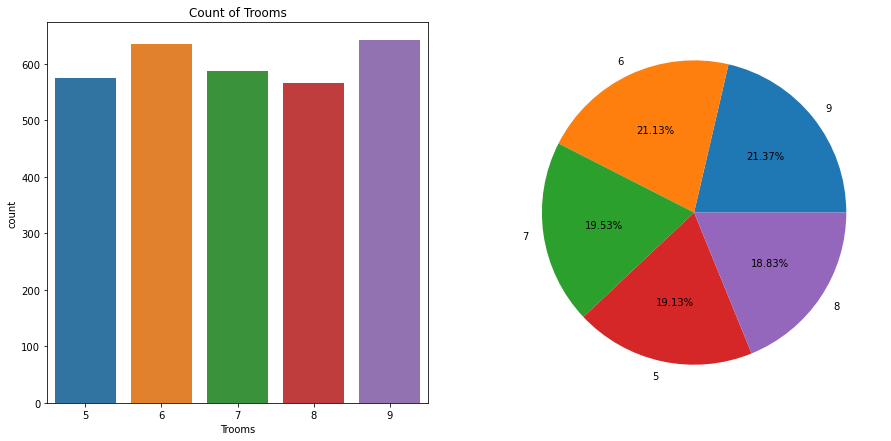

In [157]:
visual_of_cat('Trooms')

## ***Interpretation: 
### The dataset indicates that about same no of houses have 5,6,7,8 and 9 rooms i.e. 20%

## analysis of Nbedrooms

In [13]:
info_of_cat('Nbedrooms')

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
No of unique values Nbedrooms are 7
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


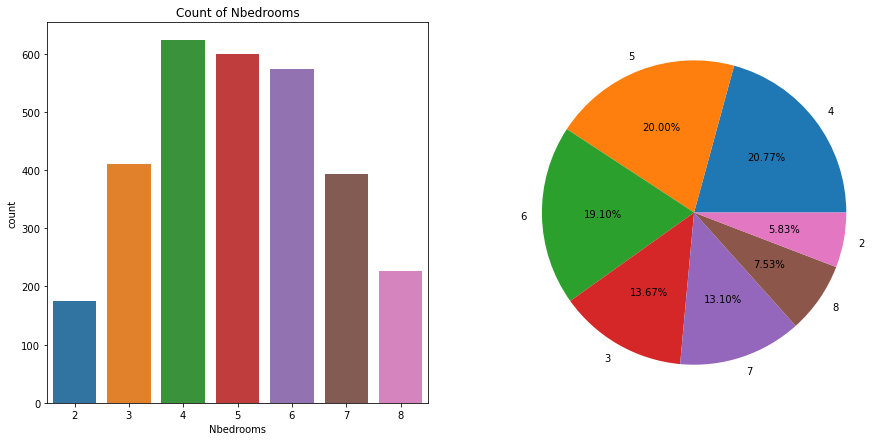

In [14]:
visual_of_cat('Nbedrooms')

## ***Interpretation: 
### The dataset indicates that max houses have 4 ,5 or 6 bedrooms  i.e. about 20% in each category 

## analysis of Nbwashrooms

In [15]:
info_of_cat('Nbwashrooms')

Unique values in Nbwashrooms are: [4 3 6 7 5 2 8 1]
No of unique values Nbwashrooms are 8
Mode of Nbwashrooms is 4
Number of missing values in Nbwashrooms is 0


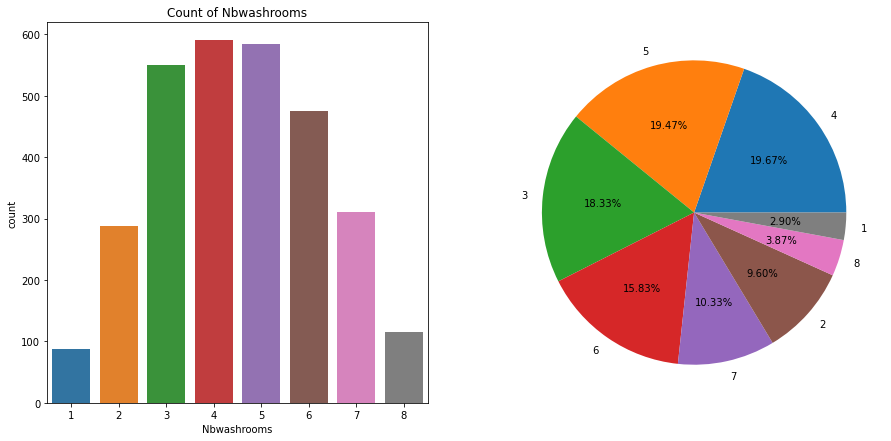

In [16]:
visual_of_cat('Nbwashrooms')

## ***Interpretation:  
### The dataset indicates that max no of houses have 4, 5 or bedrooms with attached washrooms i.e, about 19% in each category 

## analysis of Twashrooms

In [17]:
info_of_cat('Twashrooms')

Unique values in Twashrooms are: [ 6  4  5  7  9  8  3  2 10]
No of unique values Twashrooms are 9
Mode of Twashrooms is 5
Number of missing values in Twashrooms is 0


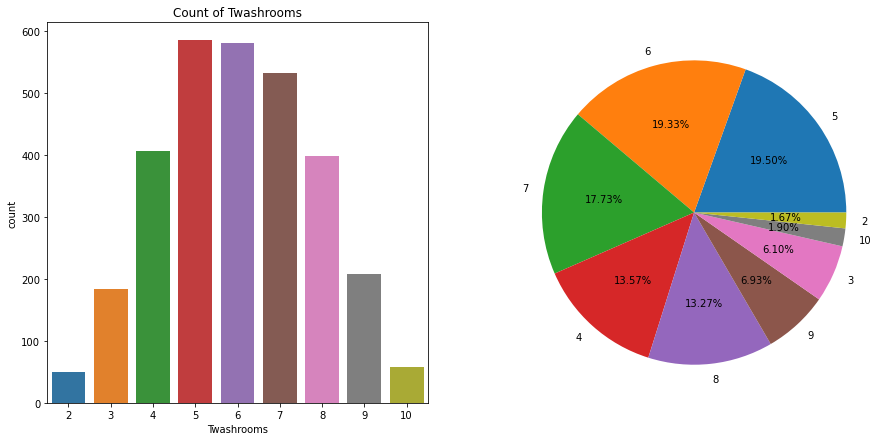

In [18]:
visual_of_cat('Twashrooms')

## ***Interpretation: 
### The dataset indicates that max no of houses have 5,6 or 7 washrooms i.e. about 19% in each category 

## analysis of roof

In [19]:
info_of_cat('roof')

Unique values in roof are: ['NO' 'YES']
No of unique values roof are 2
Mode of roof is YES
Number of missing values in roof is 0


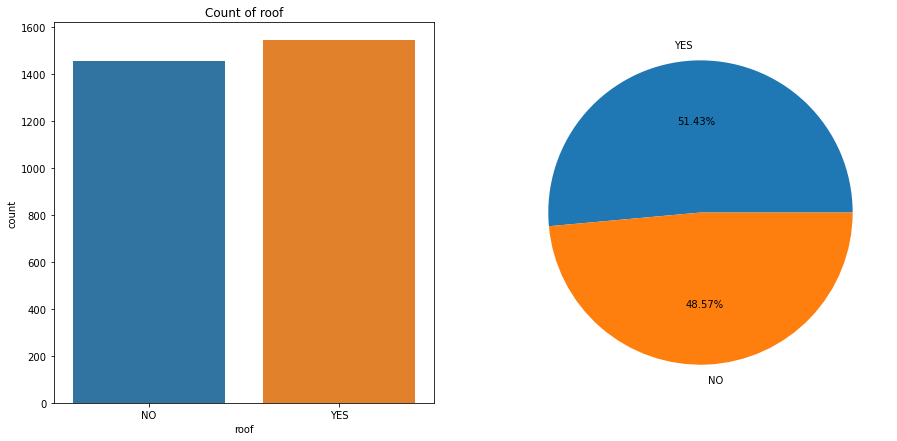

In [20]:
visual_of_cat('roof')

## ***Interpretation: 
### The dataset indicates that about 51% houses have roof and about 49% doesn't

## analysis of Nfloors

In [21]:
info_of_cat('Nfloors')

Unique values in Nfloors are: [2 3 5 6 1 4 7]
No of unique values Nfloors are 7
Mode of Nfloors is 3
Number of missing values in Nfloors is 0


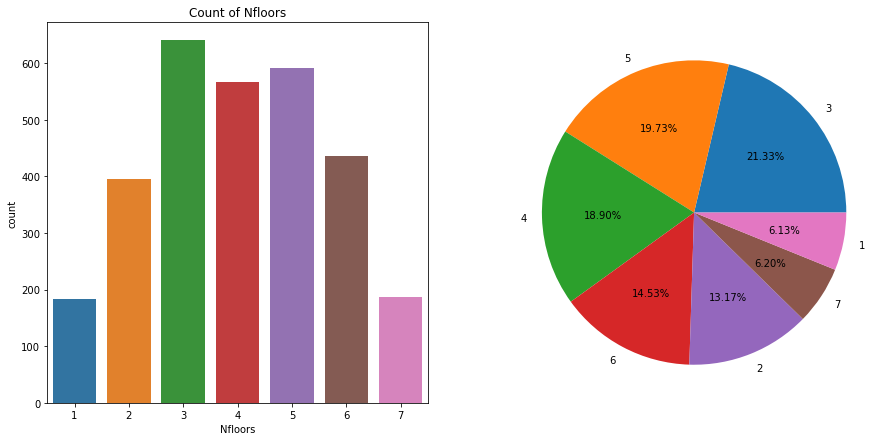

In [22]:
visual_of_cat('Nfloors')

## ***Interpretation:
### The dataset indicates that max no of houses have 3 floors about 21% followed by 5 floors and 4 floors about 20% and 19% respectively

## analysis of ANB

In [23]:
info_of_cat('ANB')

Unique values in ANB are: [6 4 3 2 1 5]
No of unique values ANB are 6
Mode of ANB is 5
Number of missing values in ANB is 0


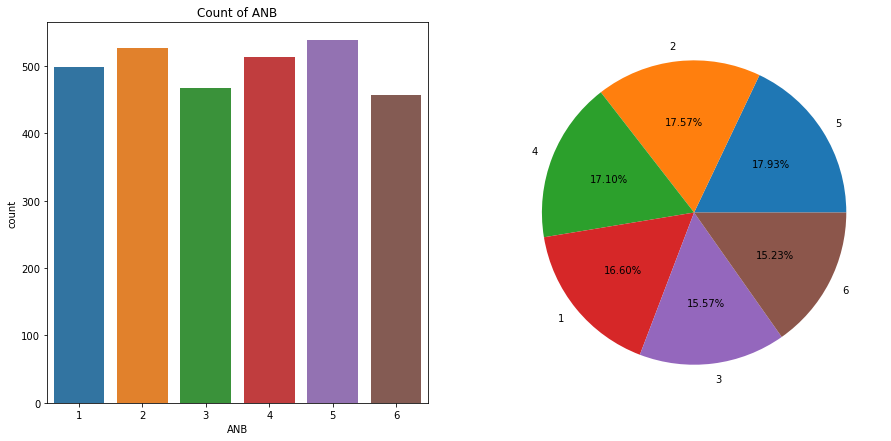

In [24]:
visual_of_cat('ANB')

## ***Interpretation:
### The dataset indicates that about same no of  houses are having ANB values of 1,2,3,4,5 i.e. about 15-18% in each category

## analysis of Grade

In [25]:
info_of_cat('Grade')

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
No of unique values Grade are 5
Mode of Grade is D
Number of missing values in Grade is 0


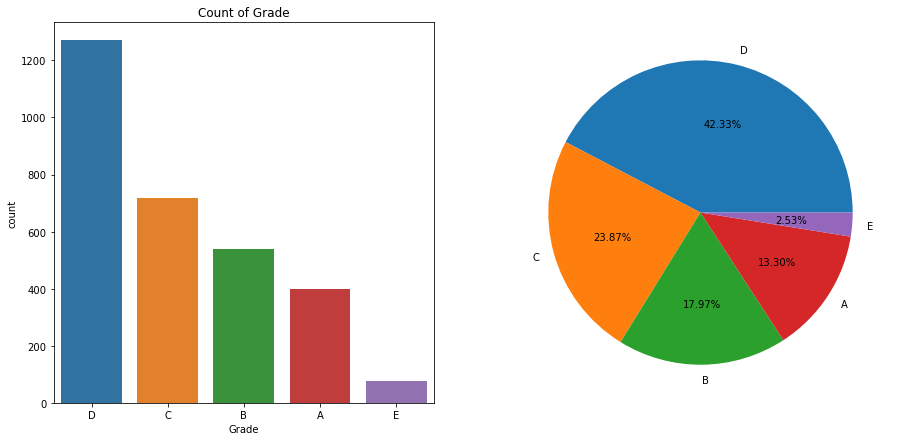

In [26]:
visual_of_cat('Grade')

## ***Interpretation:
### Grade is our target variable and the dataset indicates that majority of house are of D grade about 42% 
### and min no of houses have E grade about 2.5% .
### About 13% of houses have best grade i.e. A

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think about how the missing values could be treated. \
Think about the kind of graph/chart that can be plotted using this data.

## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values

In [27]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [273]:
def visual_of_num(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))            
    sns.histplot(x = df[col], ax =ax[1], palette='blues') 
    sns.boxplot(x = df[col], ax = ax[0], color = "c") 
    plt.show()

In [274]:
continuous

['Id', 'Area(total)', 'Roof(Area)', 'Lawn(Area)', 'API', 'Expected price']

## analysis of Area(total)

In [275]:
info_of_numerical('Area(total)')

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The mode of the Area(total) is 344
The standard deviation of the Area(total) is 20.50774244442138
Number of missing values in the Area(total) is 0


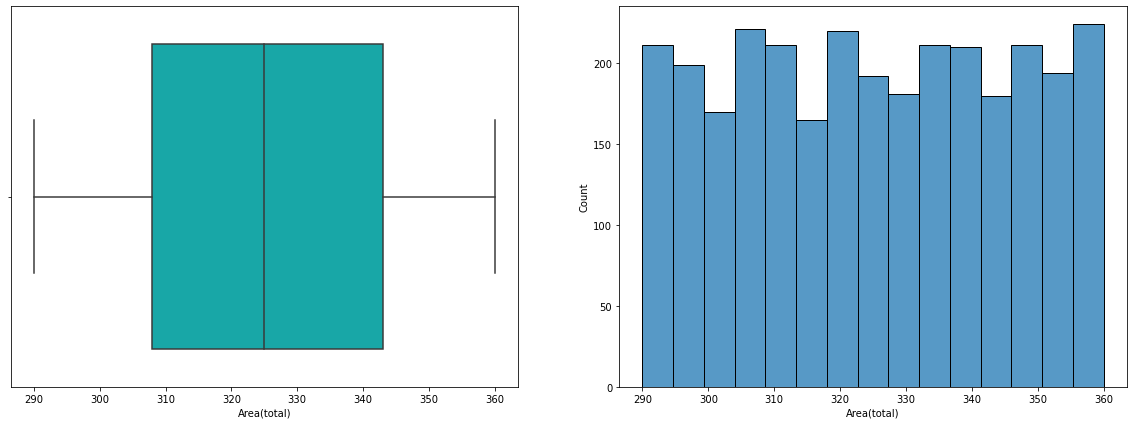

In [276]:
visual_of_num('Area(total)')

## ***Interpretation: 
### The dataset indicates that there are no outliers and max no of houses have area between 300 and 350

## analysis of Roof(Area)

In [277]:
info_of_numerical('Roof(Area)')

The mean of the Roof(Area) is 48.980666666666664
The median of the Roof(Area) is 71.0
The mode of the Roof(Area) is 0
The standard deviation of the Roof(Area) is 48.74664129867301
Number of missing values in the Roof(Area) is 0


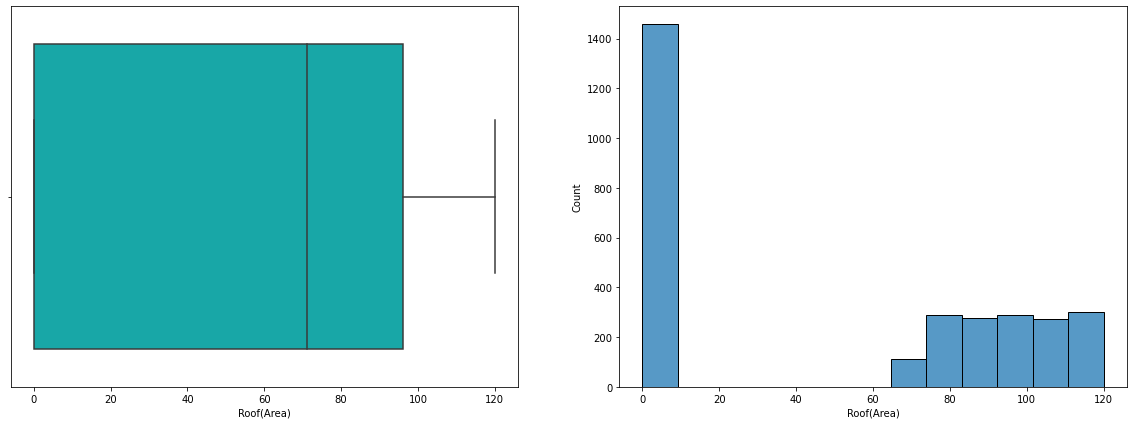

In [278]:
visual_of_num('Roof(Area)')

## ***Interpretation: 
### The dataset indicates that about 49% of houses don't have roof 
## we can seperate those houses to get a clear picture

In [279]:
a=df[df['Roof(Area)']!=0]
a

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
5,6,314,8,7,6,7,YES,81,93,6,93,1,4012,B
6,7,332,9,8,7,9,YES,103,120,6,87,4,4503,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,2989,290,5,3,2,3,YES,90,79,1,89,2,2961,D
2990,2991,298,6,4,3,4,YES,83,109,4,58,5,2849,D
2991,2992,325,7,4,3,4,YES,100,76,3,81,1,3495,D
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B


In [280]:
print(f"The mean of the roof area is {a['Roof(Area)'].mean()}")
print(f"The median of the roof area is {a['Roof(Area)'].median()}")
print(f"The mode of the roof area is {a['Roof(Area)'].mode()[0]}")
print(f"The standard deviation of the roof area is {a['Roof(Area)'].std()}")
print(f"Number of missing values in the roof area is {a['Roof(Area)'].isnull().sum()}")

The mean of the roof area is 95.23136746597537
The median of the roof area is 96.0
The mode of the roof area is 116
The standard deviation of the roof area is 14.632515402807202
Number of missing values in the roof area is 0


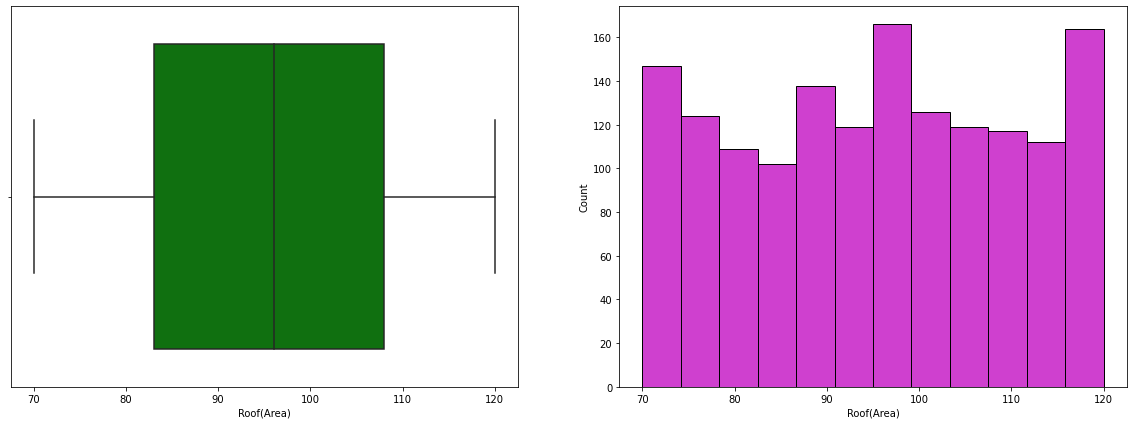

In [281]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))            
sns.histplot(x = a['Roof(Area)'], ax =ax[1], color = "m") 
sns.boxplot(x = a['Roof(Area)'], ax = ax[0], color = "g") 
plt.show()

## ***Interpretation: 
### The dataset indicates that there are no outliers and max no of houses having roof have roof area between 83 and 108

## analysis of Lawn(Area)

In [282]:
info_of_numerical('Lawn(Area)')

The mean of the Lawn(Area) is 95.60933333333334
The median of the Lawn(Area) is 96.0
The mode of the Lawn(Area) is 101
The standard deviation of the Lawn(Area) is 14.83738843555081
Number of missing values in the Lawn(Area) is 0


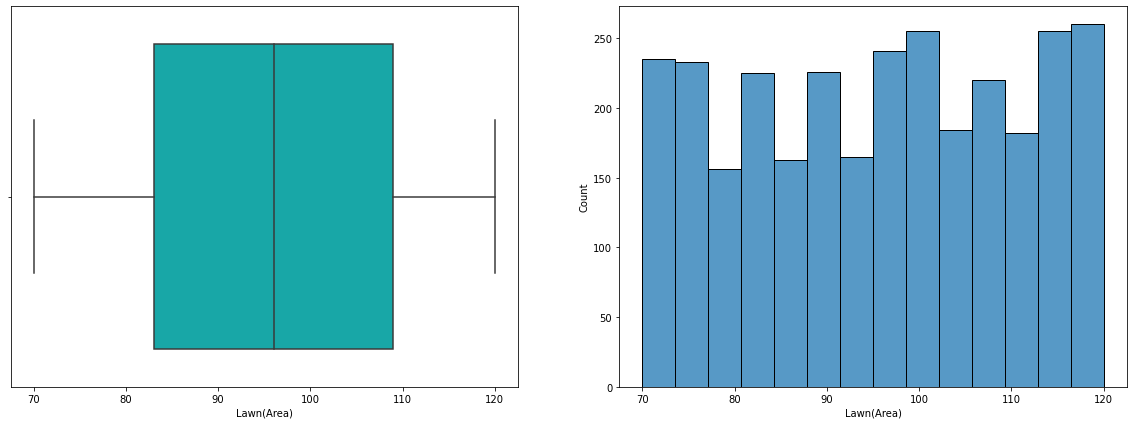

In [283]:
visual_of_num('Lawn(Area)')

## ***Interpretation: 
### The dataset indicates that majority of houses have lawn area between 83 to 109

## analysis of API

In [284]:
info_of_numerical('API')

The mean of the API is 70.19066666666667
The median of the API is 70.0
The mode of the API is 77
The standard deviation of the API is 17.563460306410814
Number of missing values in the API is 0


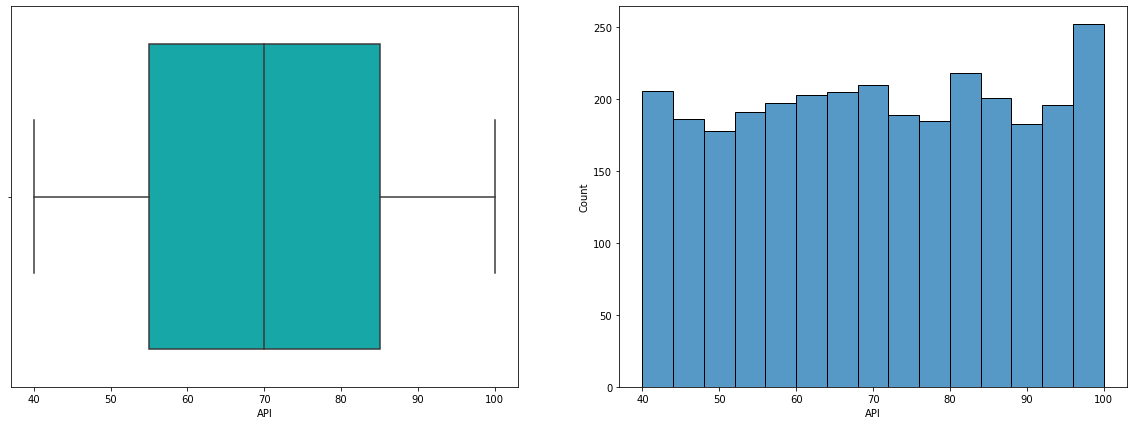

In [285]:
visual_of_num('API')

## ***Interpretation:
### The dataset indicates that majority of houses are located in areas having API values between 55 and 85

## analysis  of Expected price

In [286]:
info_of_numerical('Expected price')

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The mode of the Expected price is 3335
The standard deviation of the Expected price is 567.1899952345067
Number of missing values in the Expected price is 0


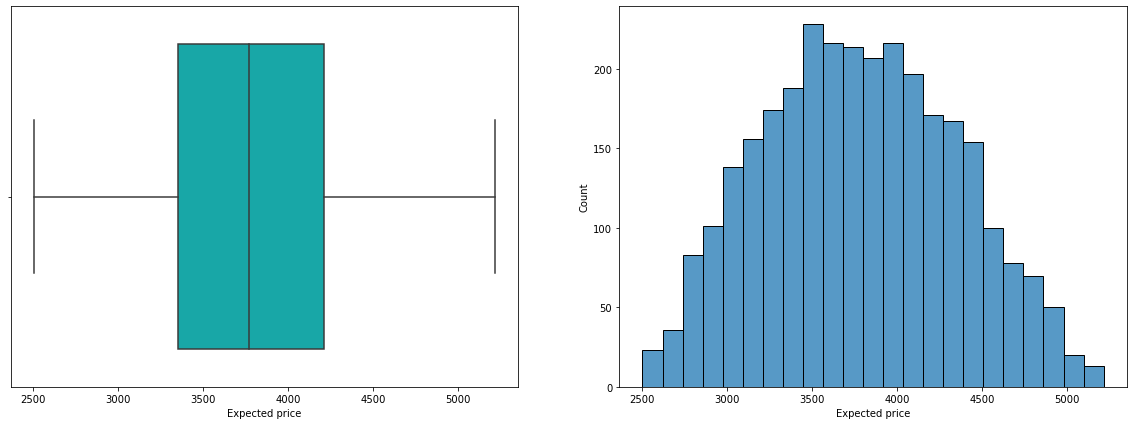

In [287]:
visual_of_num('Expected price')

## ***Interpretation: 
### The dataset indicates that it is following normal distribution and majority of houses have price between 3200 and 4300

# level 2 analysis

In [43]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


## relationship of price with grade

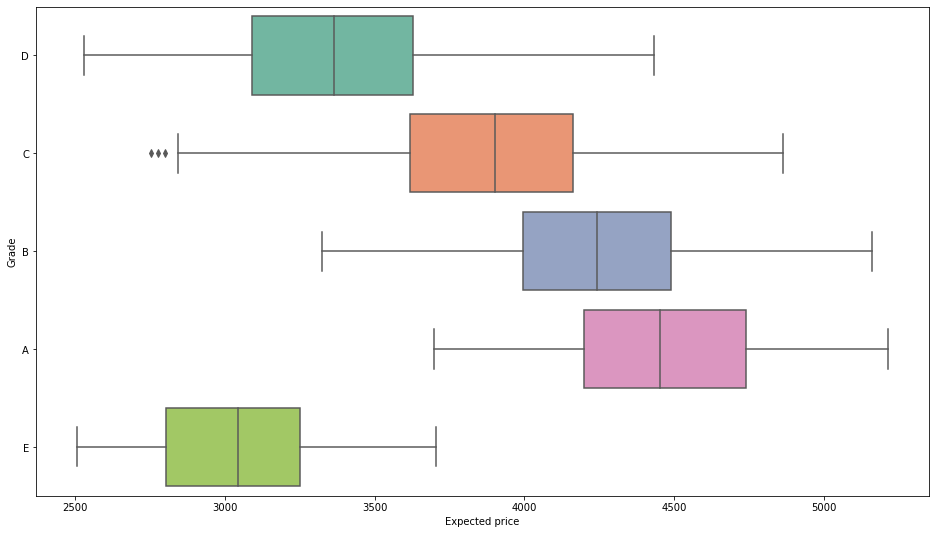

In [135]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = "Expected price",y= 'Grade', data = df,palette='Set2')
plt.show()

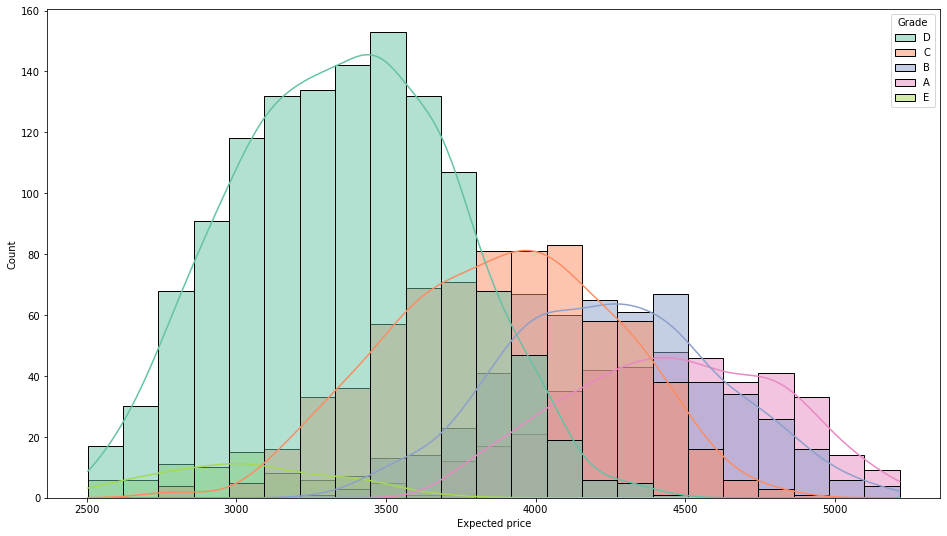

In [136]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.histplot( x = "Expected price",hue= 'Grade',kde=True, data = df,palette='Set2')
plt.show()

## ***Interpretation: 
### The dataset indicates that E grade houses have lowest price and A grade houses have highest price

## analysis of Nbedrooms with Grade

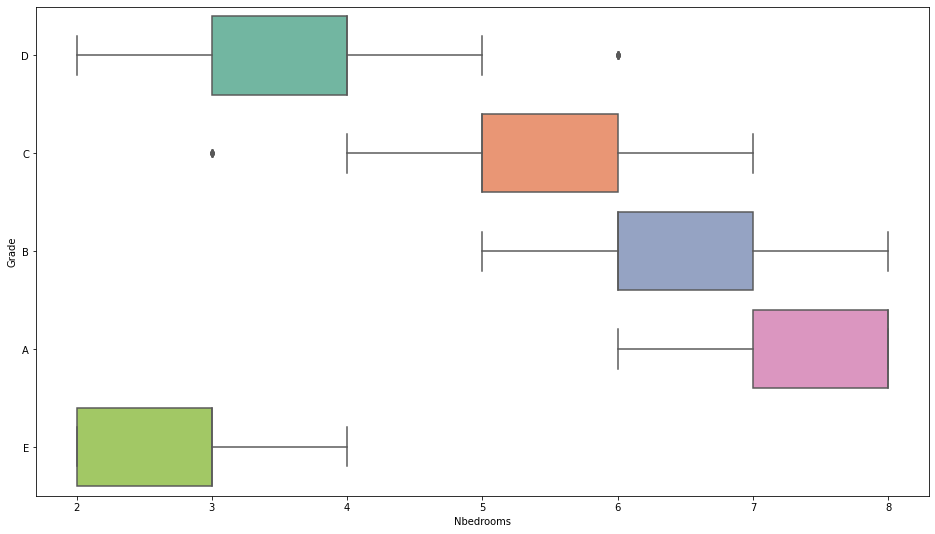

In [134]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = 'Nbedrooms',y= 'Grade', data = df,palette='Set2')
plt.show()

## interpretation:
### we can see that as no of bedrooms increase prices also increses
### A grade houses have generally more than 6 bedrooms and
### E grade has least no of bedrooms about 2 or 3

## analysis of Nbwashrooms with grade

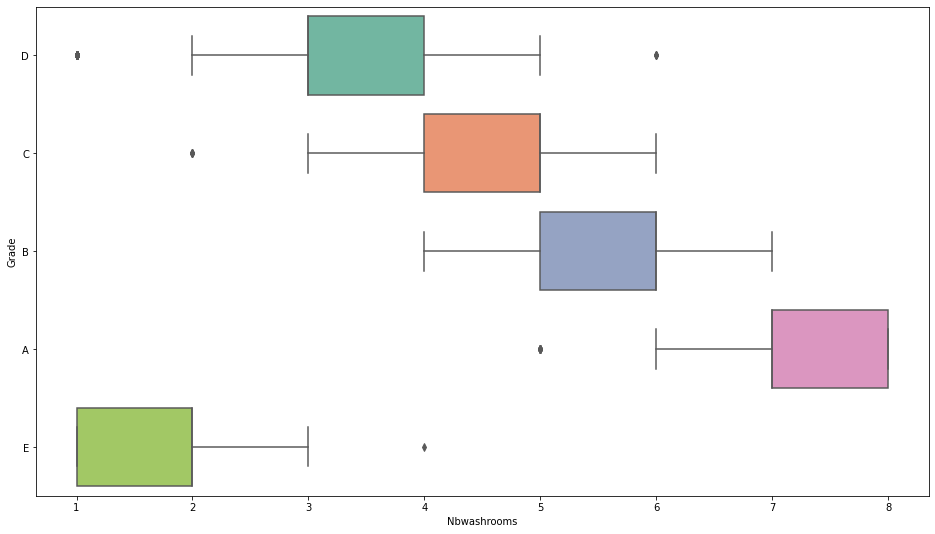

In [132]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = 'Nbwashrooms',y= 'Grade', data = df,palette='Set2')
plt.show()

## interpretation: 
### we can see that as no of washrooms increase prices also increses
### A grade houses have generally more than 6 washrooms and
### E grade has least no of washrooms about 1 or 2

## analysis of roof with grade

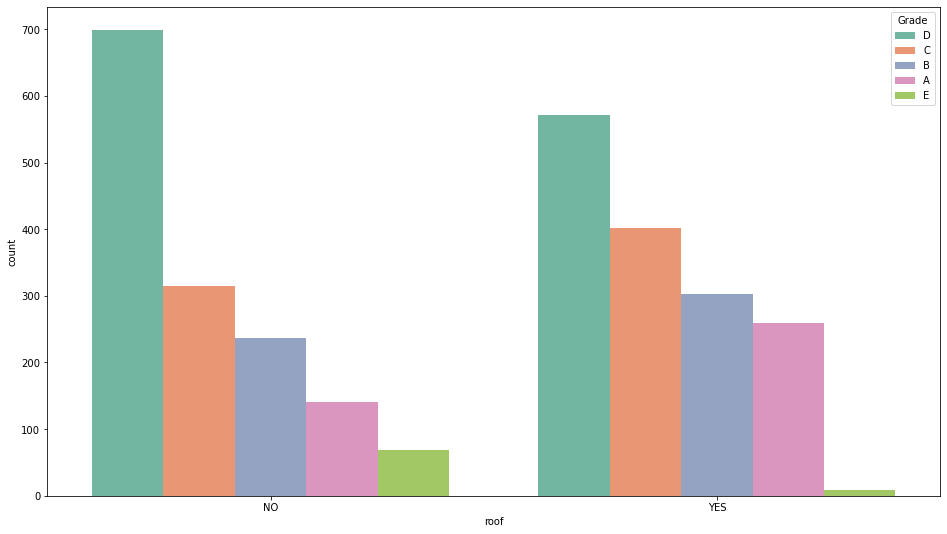

In [133]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot( x = 'roof',hue= 'Grade', data = df,palette='Set2')
plt.show()

## interpretation:
### we can see that majority of houses of A,B and C grade have roofs whereas majority of D and E grade houses are not having roofs

## analysis of Nfloors with grade

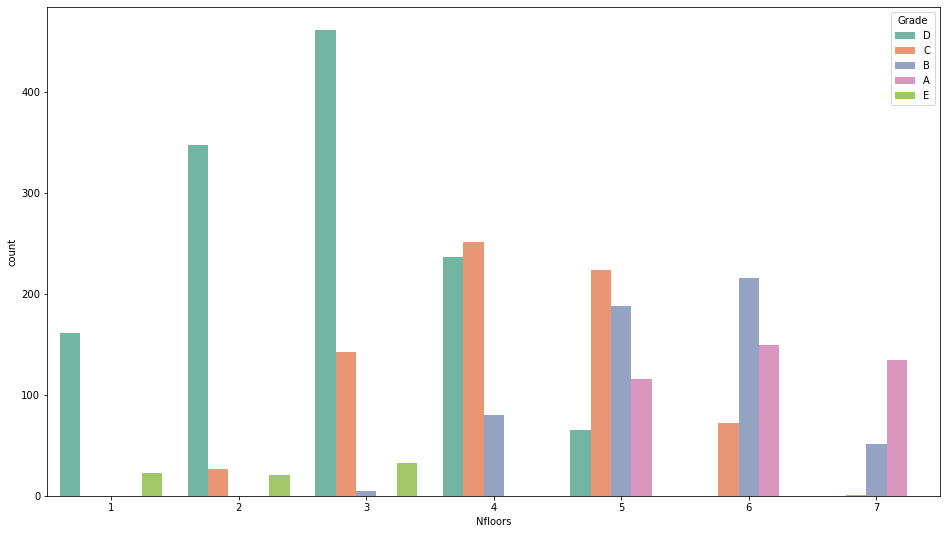

In [159]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot( x = 'Nfloors',hue= 'Grade', data = df,palette='Set2')
plt.show()

## interpretation :
### A grade houses have min 5 floors and E grade houses have max 3 floors

## analysis of grade with Area(total)

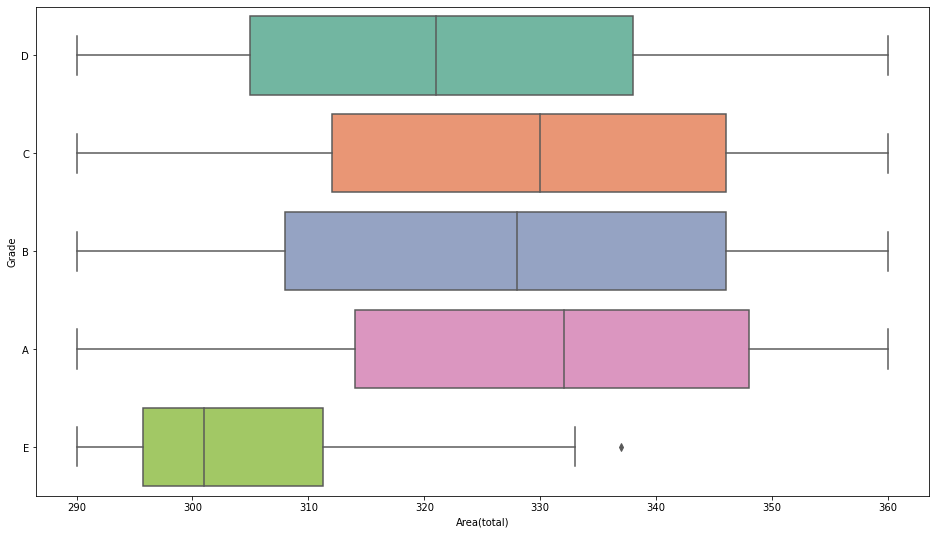

In [160]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = 'Area(total)',y= 'Grade', data = df,palette='Set2')
plt.show()

## interpretation:
### generally higher the area of house higher is the grade of that house

## analysis of grade with roof area

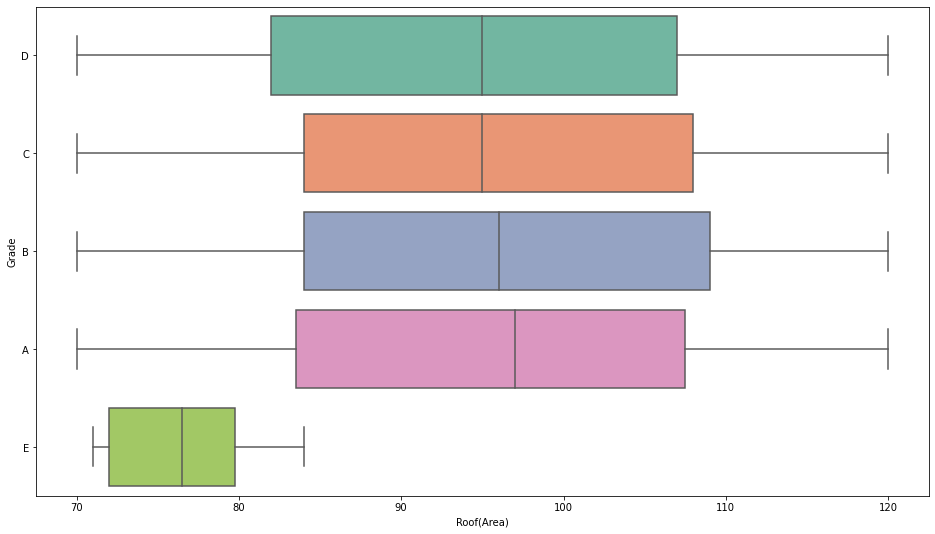

In [161]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = 'Roof(Area)',y= 'Grade', data = a,palette='Set2')
plt.show()

## interpretation:
### apart from E grade houses other grades houses have somewhat similar roof area

## analysis of lawn area with grade

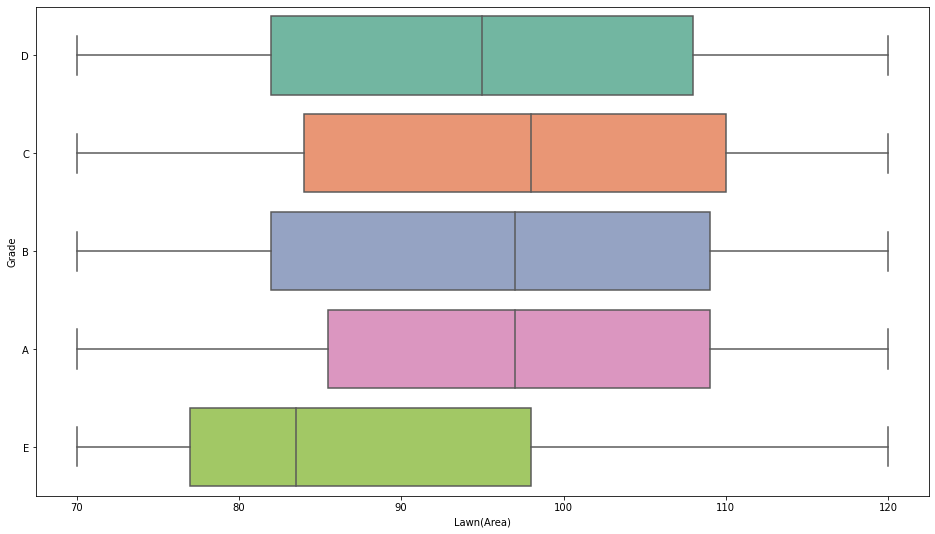

In [162]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = 'Lawn(Area)',y= 'Grade', data = df,palette='Set2')
plt.show()

## interpretation:
### apart from E grade houses other grades houses have somewhat similar lawn area

## analysis of api with grade

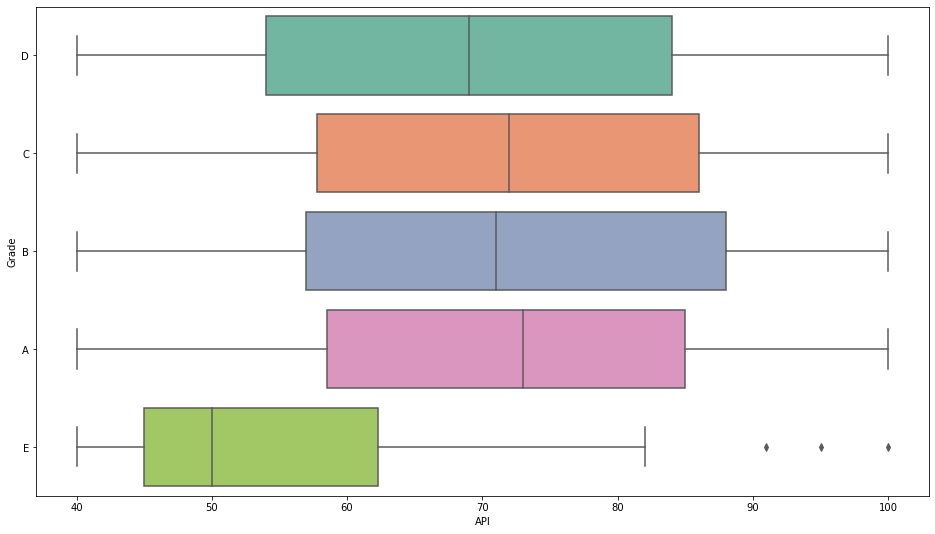

In [163]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = 'API',y= 'Grade', data = df,palette='Set2')
plt.show()

## interpretation: 
### apart from E grade houses other grades houses are located in areas having somewhat similar api level 

## feature engineering

In [60]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### converting roof and grade columns

In [61]:
dfc=df.copy()
dfc['Grade']=dfc['Grade'].astype('category')
dfc['roof']=dfc['roof'].astype('category')

## label encoder

In [63]:
encoder=LabelEncoder()
dfc['Grade']=encoder.fit_transform(dfc['Grade'])
dfc['roof']=encoder.fit_transform(dfc['roof'])

In [64]:
dfc.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int32
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int32
dtype: object

## feature selection

In [65]:
corr=dfc.corr() # finding the correlation values between all features
corr.style.background_gradient(cmap='coolwarm')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


## selecting these columns: Area(total)','Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Nfloors','Expected price','Area(total)','Roof(Area)'

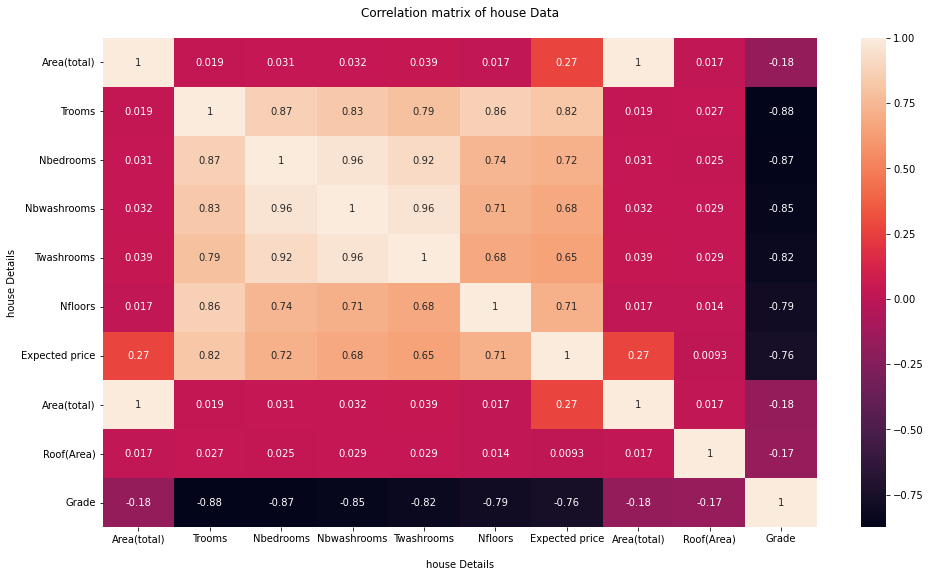

In [99]:
new_df=dfc[['Area(total)','Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Nfloors','Expected price','Area(total)','Roof(Area)','Grade']]
plt.figure(figsize=(16,9))
hm = sns.heatmap(new_df.corr(), annot = True)
hm.set(xlabel='\nhouse Details', ylabel='house Details', title = "Correlation matrix of house Data\n")
plt.show()

## train test split

In [67]:
X=new_df.drop('Grade',axis=1)
y=new_df['Grade']

In [68]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((2100, 9), (900, 9), (2100,), (900,))

## scaling

In [69]:
scaler=StandardScaler() # usoig standard scaler

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# logistic regression model

In [209]:
lr_model=LogisticRegression()

lr_model.fit(X_train,y_train)

D:\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
lr_y_pred=lr_model.predict(X_test)
lr_y_pred

array([2, 3, 1, 0, 0, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 1, 1, 3,
       3, 2, 2, 2, 0, 2, 2, 3, 3, 1, 3, 0, 1, 3, 0, 3, 2, 2, 0, 3, 2, 3,
       1, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 3, 1, 2, 3, 2, 2, 2, 3, 3, 3, 1,
       4, 3, 1, 1, 3, 3, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 0, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 3, 2, 3, 3, 2, 0, 3, 3, 3, 2, 2, 0, 3, 2, 0, 2, 1, 2,
       1, 3, 2, 1, 4, 2, 3, 3, 3, 0, 0, 1, 3, 0, 3, 2, 3, 0, 1, 3, 3, 3,
       3, 3, 2, 2, 0, 2, 3, 1, 3, 2, 2, 2, 4, 2, 3, 3, 2, 1, 3, 3, 2, 1,
       3, 3, 0, 3, 0, 4, 2, 3, 0, 2, 3, 0, 3, 2, 3, 2, 0, 3, 3, 3, 1, 2,
       3, 0, 0, 0, 3, 3, 1, 2, 3, 3, 1, 1, 1, 1, 3, 0, 1, 3, 0, 3, 3, 3,
       3, 3, 2, 3, 0, 1, 1, 1, 0, 3, 2, 3, 2, 0, 3, 3, 3, 0, 2, 1, 2, 1,
       3, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 3, 3, 3, 4, 3, 3, 3, 2,
       0, 3, 2, 0, 2, 2, 1, 1, 1, 1, 3, 2, 1, 3, 3, 2, 3, 3, 3, 0, 3, 4,
       2, 1, 3, 2, 3, 0, 3, 0, 3, 3, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 2, 3,
       2, 3, 3, 3, 1, 3, 1, 1, 3, 0, 3, 0, 2, 3, 3,

In [211]:
log_coeff=lr_model.coef_ # coefficients of features in the model for various classes
log_coeff

array([[ 1.37951564,  5.90649858,  4.38088197,  2.98420681,  2.31315116,
         3.41061433,  0.73871008,  1.37951564,  2.75042117],
       [ 0.80058379,  2.59940243,  1.67293706,  1.07211962,  0.9041688 ,
         1.24364682,  0.22165708,  0.80058379,  1.48838318],
       [ 0.15851428, -0.78157368, -0.41318499, -0.02062322, -0.8299197 ,
        -0.53148239,  0.03799181,  0.15851428,  0.2361721 ],
       [-0.72429171, -3.34992924, -2.32652623, -1.53744849, -0.94117425,
        -1.98069972, -0.37774275, -0.72429171, -1.47583717],
       [-1.614322  , -4.37439809, -3.31410782, -2.49825472, -1.44622601,
        -2.14207904, -0.62061621, -1.614322  , -2.99913928]])

### ploting confusion matrix

D:\anacon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


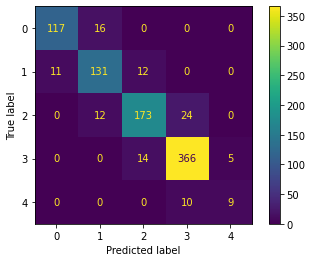

In [212]:
plot_confusion_matrix(lr_model,X_test,y_test);

### classification report

In [213]:

print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       133
           1       0.82      0.85      0.84       154
           2       0.87      0.83      0.85       209
           3       0.92      0.95      0.93       385
           4       0.64      0.47      0.55        19

    accuracy                           0.88       900
   macro avg       0.83      0.80      0.81       900
weighted avg       0.88      0.88      0.88       900



In [231]:
acc_lr=accuracy_score(y_test, lr_y_pred)
print('accuracy:', accuracy_score(y_test, lr_y_pred)) # accuracy in test data

accuracy: 0.8844444444444445


In [232]:
# making a list for appending accuracy scores of varioous models

In [243]:
results=[]
names=[]
meanres=[]

In [244]:
results.append(acc_lr)
meanres.append(acc_lr)
names.append('logistic regression')

# gaussian naive bayes model

In [245]:
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [246]:
cl_y_pred = classifier.predict(X_test) 
cl_y_pred

array([2, 3, 1, 0, 0, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3, 4, 3, 3, 2, 0, 3,
       3, 2, 1, 2, 0, 2, 2, 3, 3, 1, 4, 0, 2, 3, 1, 3, 2, 2, 0, 4, 3, 4,
       1, 1, 1, 2, 3, 3, 1, 2, 3, 1, 4, 3, 1, 2, 3, 2, 2, 2, 3, 3, 3, 1,
       4, 3, 1, 1, 2, 3, 0, 1, 2, 0, 3, 2, 3, 1, 2, 3, 0, 1, 1, 0, 2, 1,
       1, 2, 1, 0, 4, 1, 2, 3, 2, 0, 3, 4, 3, 2, 2, 0, 4, 2, 0, 2, 1, 2,
       1, 3, 2, 2, 4, 2, 3, 3, 3, 0, 0, 1, 4, 0, 3, 2, 3, 0, 1, 3, 3, 3,
       3, 4, 1, 2, 0, 2, 4, 1, 3, 3, 1, 2, 4, 2, 2, 4, 1, 1, 2, 3, 2, 2,
       4, 3, 0, 3, 1, 4, 1, 3, 0, 2, 3, 0, 3, 1, 3, 1, 0, 3, 3, 2, 1, 2,
       3, 0, 0, 1, 3, 3, 0, 2, 3, 3, 1, 1, 2, 1, 3, 0, 1, 3, 0, 3, 4, 3,
       3, 3, 1, 3, 0, 2, 1, 1, 0, 3, 2, 3, 2, 0, 3, 3, 3, 0, 1, 1, 1, 1,
       3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 3, 2, 2, 0, 3, 3, 4, 4, 3, 3, 3, 2,
       0, 3, 1, 0, 2, 1, 1, 1, 1, 0, 3, 2, 1, 3, 3, 2, 3, 2, 3, 0, 3, 4,
       2, 1, 3, 2, 3, 0, 4, 0, 3, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 2, 4,
       2, 3, 3, 3, 1, 3, 2, 1, 3, 0, 3, 0, 1, 3, 2,

### plot confusion matrix

D:\anacon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


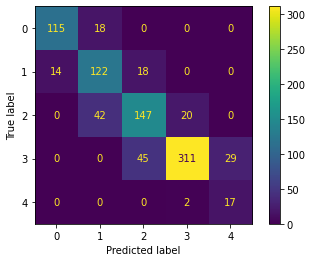

In [247]:

plot_confusion_matrix(classifier,X_test,y_test);

### classification report

In [248]:
print(classification_report(y_test,cl_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       133
           1       0.67      0.79      0.73       154
           2       0.70      0.70      0.70       209
           3       0.93      0.81      0.87       385
           4       0.37      0.89      0.52        19

    accuracy                           0.79       900
   macro avg       0.71      0.81      0.74       900
weighted avg       0.82      0.79      0.80       900



In [249]:
acc_cl=accuracy_score(y_test, cl_y_pred)
print('accuracy:', accuracy_score(y_test, cl_y_pred)) # accuracy in test data

accuracy: 0.7911111111111111


In [250]:
results.append(acc_cl)
meanres.append(acc_cl)
names.append('gaussian bayes')

# decision tree classifier model


In [252]:
DT = DecisionTreeClassifier()

cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_DT = cross_val_score(DT, X, y, scoring='accuracy', cv=cv2, n_jobs=-1, error_score='raise')
results.append(n_scores_DT)
names.append('DecisionTree')


print( n_scores_DT.mean())
meanres.append(n_scores_DT.mean())

0.8250000000000001


# random forest classifier

In [254]:
model = RandomForestClassifier()


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('rf')


print('Accuracy-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
meanres.append(n_scores.mean())

Accuracy-Score: 0.873 (0.017)


# boosting

In [255]:
Ada_model = AdaBoostClassifier()

cv4 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
n_scores_Ada = cross_val_score(Ada_model, X, y, scoring='accuracy', cv=cv4, n_jobs=-1, error_score='raise')
results.append(n_scores_Ada)
names.append('Adabooting')

print("Accuracy", n_scores_Ada.mean()*100)
meanres.append(n_scores_Ada.mean())

Accuracy 59.24444444444445


# stacking

In [227]:
def get_stacking():
    
    level0 = list()
    
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('rfc',RandomForestClassifier()))
    
    level1 = LogisticRegression()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)
    return model

In [256]:
model_S = get_stacking()

cv5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
n_scores_S = cross_val_score(model_S, X, y, scoring='accuracy', cv=cv5, n_jobs=-1, error_score='raise')
results.append(n_scores_S)
names.append('stacking')

print("Accuracy :",round(n_scores_S.mean()*100,2))
meanres.append(n_scores_S.mean())

Accuracy : 87.38


## comparing accuracy scores of various models

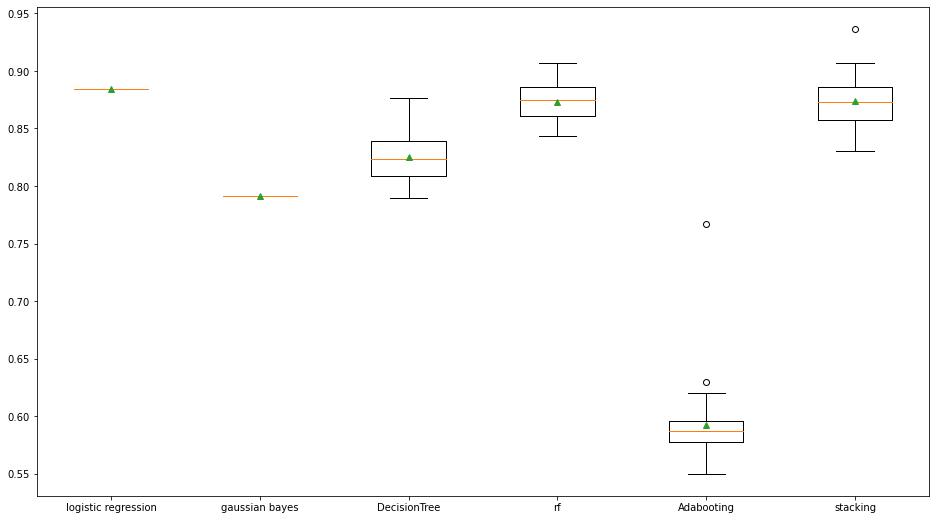

In [257]:
plt.figure(figsize=(16,9))
plt.boxplot(results,labels=names,showmeans=True)
plt.show()

In [258]:
per=pd.DataFrame({'models':names,'accuracy score':meanres})
per

,models,accuracy score
0,logistic regression,0.884444
1,gaussian bayes,0.791111
2,DecisionTree,0.825000
3,rf,0.873111
4,Adabooting,0.592444
5,stacking,0.873778


## conclusion
### we can take logistic regression as our best model as it is having highest accuracy score of 0.88 than the other models

In [ ]:
encoder=LabelEncoder()
dfc_train['subscription_id']=encoder.fit_transform(dfc_train['subscription_id'])
dfc_train['observation_dt']=encoder.fit_transform(dfc_train['observation_dt'])
dfc_train['specialization_id']=encoder.fit_transform(dfc_train['specialization_id'])
dfc_train['specialization_domain']=encoder.fit_transform(dfc_train['specialization_domain'])
dfc_train['is_professional_certificate']=encoder.fit_transform(dfc_train['is_professional_certificate'])
dfc_train['is_gateway_certificate']=encoder.fit_transform(dfc_train['is_gateway_certificate'])
dfc_train['learner_country_group']=encoder.fit_transform(dfc_train['learner_country_group'])
dfc_train['learner_gender']=encoder.fit_transform(dfc_train['learner_gender'])
dfc_train['is_subscription_started_with_free_trial']=encoder.fit_transform(dfc_train['is_subscription_started_with_free_trial'])
dfc_train['is_active_capstone_during_pay_period']=encoder.fit_transform(dfc_train['is_active_capstone_during_pay_period'])


dfc_test['subscription_id']=encoder.fit_transform(dfc_test['subscription_id'])
dfc_test['observation_dt']=encoder.fit_transform(dfc_test['observation_dt'])
dfc_test['specialization_id']=encoder.fit_transform(dfc_test['specialization_id'])
dfc_test['specialization_domain']=encoder.fit_transform(dfc_test['specialization_domain'])
dfc_test['is_professional_certificate']=encoder.fit_transform(dfc_test['is_professional_certificate'])
dfc_test['is_gateway_certificate']=encoder.fit_transform(dfc_test['is_gateway_certificate'])
dfc_test['learner_country_group']=encoder.fit_transform(dfc_test['learner_country_group'])
dfc_test['learner_gender']=encoder.fit_transform(dfc_test['learner_gender'])
dfc_test['is_subscription_started_with_free_trial']=encoder.fit_transform(dfc_test['is_subscription_started_with_free_trial'])
dfc_test['is_active_capstone_during_pay_period']=encoder.fit_transform(dfc_test['is_active_capstone_during_pay_period'])